# Paper Plots

In [53]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from NVcenter import *
plt.style.use('NVcenter-default')

import numpy as np 
import matplotlib.pyplot as plt
import qutip as q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
# populations
# %%time
directory = os.path.join(os.getcwd(), "baths")
for filename in ["bench_full10", "bench_full12", "bench_full15", "bench_full18"]:
    bath_configs = load_spin_baths(filename, directory)
    
    import time
    t0 = time.time()
    
    for Bz in [1e-6]:
        for env_approx_level in ['full_bath']:#['no_bath', 'gCCE0', 'gCCE1', 'gCCE2']:
            register_config = [('NV', (0, 0, 0), 0, dict(D_gs=0, Bz=Bz, N_zz=0, can_flip=False))]
            kwargs = dict(dm_offset=1e-5, verbose=True, env_approx_level=env_approx_level, bath_configs=bath_configs, suter_method=False, thermal_bath=True, parallelization=True)
            env = Environment2(register_config, **kwargs)
            
            t_end, t_steps = 80e-6, 200
            t_list = np.linspace(0, t_end, t_steps)
            miri_list = calc_miri_list(env, t_end, t_steps, pauli=False, old_register_states=[q.fock_dm(2,0)]) # pauli=False for populations
            
            # saving
            save_directory = os.path.join(os.getcwd(), "export", filename)
            os.makedirs(save_directory, exist_ok=True)
            save_filename = f"{env.env_approx_level}_{int(Bz*1e6)}uT"
            save_loc = os.path.join(save_directory, save_filename)
            np.save(save_loc, miri_list)
            print("Time: ", time.time()-t0)
            print(f'Saved as {save_loc}.npy')

Sampling over spin baths...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.49it/s]


Time:  8.431029319763184
Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\bench_full10\full_bath_1uT.npy


Sampling over spin baths...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.66it/s]


Time:  9.195684432983398
Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\bench_full12\full_bath_1uT.npy


Sampling over spin baths...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.52it/s]


Time:  11.812822818756104
Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\bench_full15\full_bath_1uT.npy


Sampling over spin baths...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.41it/s]


Time:  88.48046898841858
Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\bench_full18\full_bath_1uT.npy


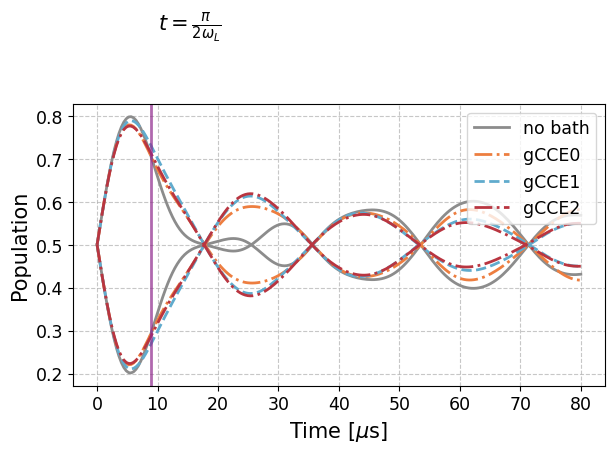

In [101]:
env_approx_levels = ['no_bath', 'gCCE0', 'gCCE1', 'gCCE2', 'full_bath']
Bz = 1e-6
import seaborn as sns
colors = ['#8c8c8c', '#ed7e40', '#60abcd', '#b93540', '#4167c7']
ls = ['-', '-.', '--', '-.', '--']
labels = ['no bath', 'gCCE0', 'gCCE1', 'gCCE2', 'exact']

fig, ax = plt.subplots(figsize=(6.4, 4.8))

for i, filename in enumerate(["bench_full10", "bench_full12", "bench_full15", "bench_full18"]):
    save_directory = os.path.join(os.getcwd(), "export", filename)
    
    env_approx_level = 'full_bath'
    save_filename = f"{env_approx_level}_{int(Bz*1e6)}uT"
    save_loc = os.path.join(save_directory, save_filename)
    up_pop, down_pop = np.load(save_loc+'.npy')
    
    t_end, t_steps = 80e-6, 200
    t_list = np.linspace(0, t_end, t_steps)
    ax.plot((t_list*1e6), up_pop[0], color=colors[i], ls=ls[i], label=labels[i])
    ax.plot((t_list*1e6), down_pop[0], color=colors[i], ls=ls[i])

ax.legend()
ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
plt.legend(ncol=1, loc="upper right", frameon=True)
# ax.set_ylim(0,1.02)
plt.axvline(x=np.pi/abs(2*1e-6*CONST['gamma_e'])*1e6, color='#8f288c', alpha=0.7)
plt.text(10,1, r'$t=\frac{\pi}{2\omega_L}$')
plt.savefig('gCCE_benchmark.svg')
plt.show()

### Surface Electron Spin Baths

In [ ]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 100000, 100, True
directory = os.getcwd()
filename = os.path.join( "baths", "test")
kwargs = dict(
    density = 10e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 10e-9,
    bath_kwargs = dict(Bz=500e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

In [4]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 100, 100, True
directory = os.getcwd()
filename = os.path.join( "baths", "test1")
kwargs = dict(
    density = 10e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 10e-9,
    bath_kwargs = dict(Bz=500e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

Number of bath spins:  3
Bath Polarization:  0.0


In [39]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 1000, 1, False
directory = os.getcwd()
filename = os.path.join( "baths", "test_full")
kwargs = dict(
    density = 10e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 10e-9,
    bath_kwargs = dict(Bz=500e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

Number of bath spins:  3
Bath Polarization:  0.5


In [49]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 1000, 1, True
directory = os.getcwd()
filename = os.path.join( "baths", "bench")
kwargs = dict(
    density = 5e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 15e-9,
    bath_kwargs = dict(Bz=5000e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

Number of bath spins:  3
Bath Polarization:  0.0


In [58]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 1000, 1, False
directory = os.getcwd()
filename = os.path.join( "baths", "bench_full")
kwargs = dict(
    density = 5e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 15e-9,
    bath_kwargs = dict(Bz=5000e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

Number of bath spins:  3
Bath Polarization:  0.5


In [99]:
# create, save and load a spinbath
num_baths, num_init_states, all_init_states = 1000, 1, False
directory = os.getcwd()
filename = os.path.join( "baths", "bench_full18")
kwargs = dict(
    density = 5e-3 / 1e-18, # spins/nm^2 # 1e-3 - 50e-3
    shape = 'circle',
    rmin = 0, 
    rmax = 18e-9,
    bath_kwargs = dict(Bz=5000e-4, depth=10e-9),
)

spin_bath = SpinBath('e', **kwargs)
bath_configs, metadata = spin_bath.calc_spin_baths(num_baths, num_init_states, all_init_states=all_init_states)

print("Number of bath spins: ", spin_bath.num_spins)
bath_polarization = calc_bath_polarization(bath_configs)
print("Bath Polarization: ", bath_polarization)

save_spin_baths(bath_configs, metadata, directory, filename)
bath_configs = load_spin_baths(filename, directory)
#fig, ax = visualize_spin_bath(bath_configs, metadata)

Number of bath spins:  5
Bath Polarization:  0.5


### Resonance Profile

In [28]:
# data generation
directory = os.getcwd()
filename = os.path.join( "baths", "test")
bath_configs = load_spin_baths(filename, directory)

omega_list = []
for bath_config in bath_configs:
    positions = list(zip(*bath_config))[1]
    init_states = list(zip(*bath_config))[2]
    omega = 0
    for position, init_state in zip(positions, init_states):
        surface_radius = np.sqrt(position[0]**2+position[1]**2)
        depth = position[2]
        radius = np.sqrt(surface_radius**2 + depth**2)
        # calculation
        prefactor = (c.hbar * c.mu_0) / (4 * np.pi) * CONST['gamma_e']**2 / (2*np.pi)
        period_fraction = 2
        Azz = prefactor * abs(3*(depth/radius)**2-1) * 1/radius**3 
        t = 1/4 * Azz # element in the Hamiltonian 
        period = 1/(2*t) # 2/Azz
        sign = -1 if init_state==0 else +1
        omega += sign*np.pi*Azz*1e-6
    omega_list.append(omega)
np.save("omega_list1.npy", omega_list)

In [2]:
# fit histogram with a gaussian 
from scipy.optimize import curve_fit

def gaussian(x, mean, std):
    return 1/(std * np.sqrt(2*np.pi)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

omega_list = np.load("omega_list.npy")

hist_values, bin_edges = np.histogram(omega_list, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
fitted_mean, fitted_std = np.mean(omega_list), np.std(omega_list)
# initial_guess = [fitted_mean, fitted_std]
# popt, pcov = curve_fit(gaussian, bin_centers, hist_values, p0=initial_guess)
# fitted_mean, fitted_std = popt

x_fit = np.linspace(min(omega_list), max(omega_list), 1000)
y_fit = gaussian(x_fit, fitted_mean, fitted_std)

Text(0, 0.5, 'Density')

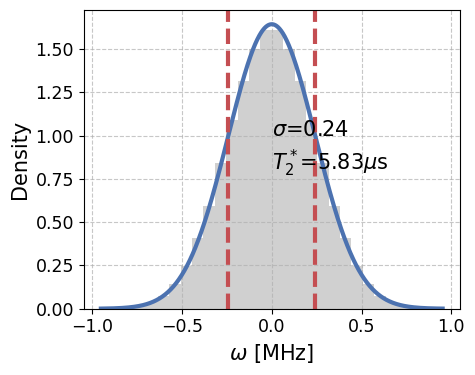

In [3]:
# plot
plt.figure(figsize=(5, 4))

plt.hist(omega_list, bins=30, density=True, alpha=0.6, color='#b2b2b2')
plt.plot(x_fit, y_fit, color='#4c72b0', linewidth=3, label="Fitted Gaussian")
plt.axvline(fitted_std, color='#c44e52', linestyle='--', label=f"Standard Deviation", linewidth=3)
plt.axvline(-fitted_std, color='#c44e52', linestyle='--', linewidth=3)

plt.text(0,1, r"$\sigma$="+f"{fitted_std:.2f}")
T2_star = 1/(np.sqrt(2)*np.pi* fitted_std/(2*np.pi))
plt.text(0,0.8, r"$T_2^*$="+f"{T2_star:.2f}" + r"$\mu$s")
plt.xlabel(r"$\omega$ [MHz]")
plt.ylabel("Density")
# plt.legend()

# plt.savefig("resonance_profile.svg")

### Free Induction Decay

In [20]:
# data generation
directory = os.path.join(os.getcwd(), "baths")
filename = "test1"
bath_configs = load_spin_baths(filename, directory)

import time
t0 = time.time()

for Bz in [100e-6]:
    for env_approx_level in ['gCCE0']:
        register_config = [('NV', (0, 0, 0), 0, dict(D_gs=0, Bz=Bz, N_zz=0, can_flip=False))]
        kwargs = dict(dm_offset=1e-5, verbose=True, env_approx_level=env_approx_level, bath_configs=bath_configs, suter_method=False, thermal_bath=True, parallelization=True)
        env = Environment2(register_config, **kwargs)
        
        t_end, t_steps = 15e-6, 1500
        t_list = np.linspace(0, t_end, t_steps)
        miri_list = calc_miri_list(env, t_end, t_steps, pauli=False, old_register_states=[q.fock_dm(2,0)]) # pauli=False for populations

Sampling over spin baths...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:43<00:00, 18.58it/s]


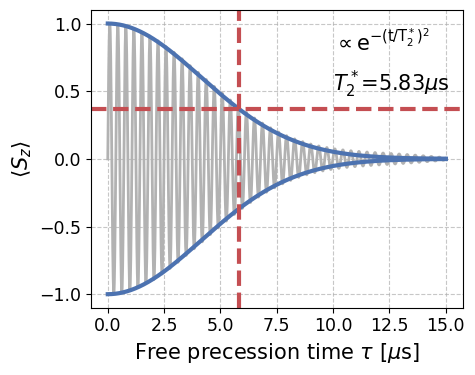

In [21]:
# plot
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_list * 1e6, miri_list[0][0]-miri_list[1][0], color="#b2b2b2")
ax.plot(t_list*1e6, np.e**(-(t_list*1e6/T2_star)**2), color="#4c72b0ff", linewidth=3)
ax.plot(t_list*1e6, -np.e**(-(t_list*1e6/T2_star)**2), color="#4c72b0ff", linewidth=3)

ax.set_ylabel(r'$\langle S_z\rangle$')
ax.set_xlabel(r'Free precession time $\tau$ [$\mu$s]' )
ax.axhline(y=1/np.e, color="#c44e52ff", linestyle='--', linewidth=3)
ax.axvline(x=T2_star, color="#c44e52ff", linestyle='--', linewidth=3)
ax.text(10, 0.8, r"$\propto\rm{e}^{-(t/T_2^*)^2}$")
ax.text(10,0.5, r"$T_2^*$="+f"{T2_star:.2f}" + r"$\mu$s")
# ax.legend()

plt.savefig("free_induction_decay.svg")

[17592918.86010284]
17611768.42


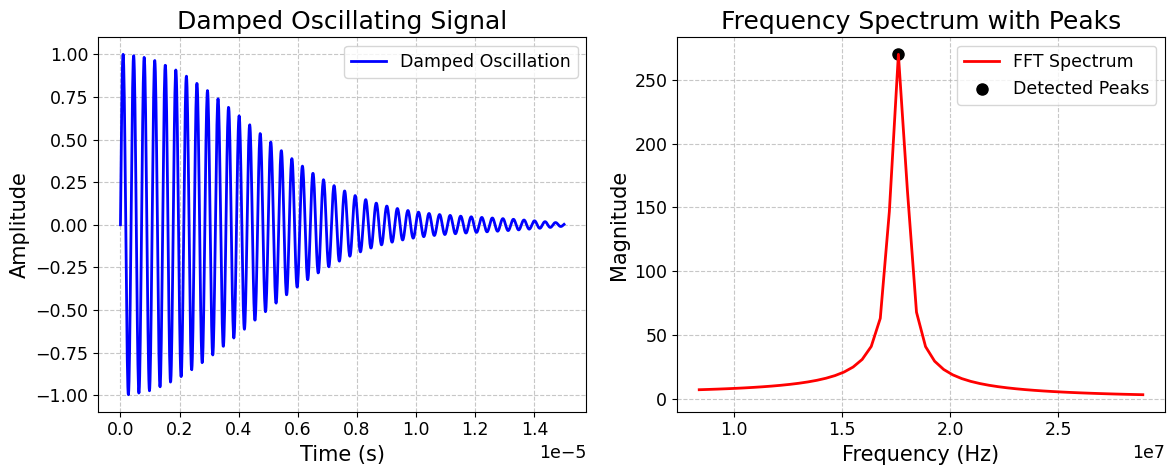

In [30]:
from scipy.signal import find_peaks

t_end = 15e-6   
t_steps = 1500
sampling_rate = int(t_steps/t_end) 

signal = miri_list[0][0]-miri_list[1][0]

fft_result = np.fft.fft(signal)
frequencies = 2*np.pi*np.fft.fftfreq(t_steps, d=1/sampling_rate)
positive_freqs = frequencies[:t_steps//2]
fft_magnitude = np.abs(fft_result[:t_steps//2])

peaks, _ = find_peaks(fft_magnitude, height=0.1, distance=5)  
peak_freqs = positive_freqs[peaks]
peak_magnitudes = fft_magnitude[peaks]
print(peak_freqs)
print(abs(CONST['gamma_e']*Bz))

# Plot the damped signal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t_list, signal, label="Damped Oscillation", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Damped Oscillating Signal")
plt.legend()

# Plot the Fourier Transform (frequency spectrum)
plt.subplot(1, 2, 2)
plt.plot(positive_freqs[20:70], fft_magnitude[20:70], label="FFT Spectrum", color='r')
plt.scatter(peak_freqs, peak_magnitudes, color='black', marker='o', label="Detected Peaks")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum with Peaks")
plt.legend()
plt.show()

### Radius Convergence

In [8]:
# data generation
surface_radius_list = np.linspace(0, 20e-9, 200)
depth_list = np.linspace(1e-12, 26e-9, 250)

time_list = np.zeros((len(depth_list), len(surface_radius_list)))
T2_star = 20e-6

for i, surface_radius in enumerate(surface_radius_list):
    for j, depth in enumerate(depth_list):
        radius = np.sqrt(surface_radius**2 + depth**2)
        # calculation
        prefactor = (c.hbar * c.mu_0) / (4 * np.pi) * CONST['gamma_e']**2 / (2*np.pi)
        period_fraction = 2
        Azz = prefactor * abs(3*(depth/radius)**2-1) * 1/radius**3 
        t = 1/4 * Azz # element in the Hamiltonian 
        period = 1/(2*t) # 2/Azz
        omega = 4*np.pi*t # np.pi*Azz
        time = period/period_fraction

        time_list[j,i] = time/T2_star * 100

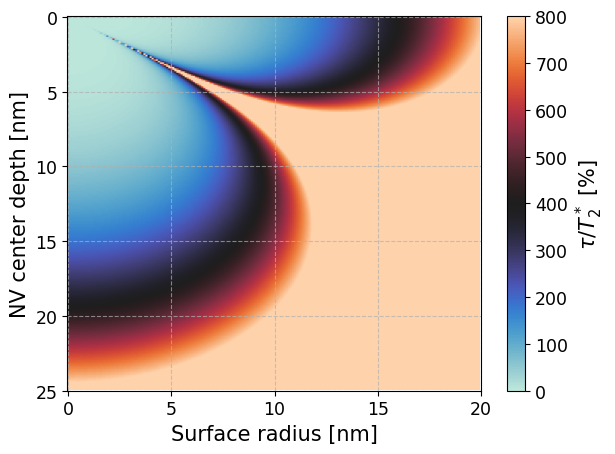

In [9]:
# plot
fig, ax = plt.subplots()

import seaborn as sns
cmap = sns.color_palette("icefire", as_cmap=True)
im = ax.imshow(time_list, cmap=cmap, aspect="auto", vmax=800)
fig.colorbar(im, ax=ax, label=r'$\tau/T_2^*$ [%]')

x_ticks = np.linspace(0, time_list.shape[1], 5)
y_ticks = np.linspace(0, time_list.shape[0], 6)
ax.set_xticks(x_ticks)
ax.set_xticklabels( np.int64(np.linspace(0, 20, 5)) )  
ax.set_yticks(y_ticks)
ax.set_yticklabels( np.int64(np.linspace(0, 25, 6)) ) 
ax.set_xlabel("Surface radius [nm]")
ax.set_ylabel("NV center depth [nm]")

plt.savefig("NV_surface_interaction.svg")

[[     0.             0.             0.       ]
 [     0.             0.             0.       ]
 [-44701.1248356      0.        -52151.3123082]]


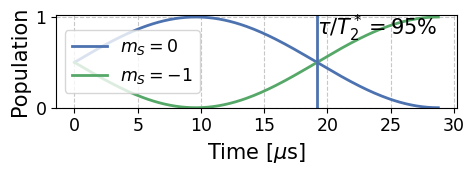

In [11]:
surface_radius = 5e-9
depth = 10e-9
T2_star = 20e-6
radius = np.sqrt(surface_radius**2 + depth**2)

def calc_interaction_sphere(time=None, radius=None):  
    prefactor = (c.hbar * c.mu_0) / (4 * np.pi) * CONST['gamma_e']**2 / (2*np.pi)
    period_fraction = 2
    
    if time is not None:
        period = period_fraction*time
        radius = (prefactor * period/2)**(1/3)
        return radius
    
    if radius is not None:
        t = 1/4 * abs(prefactor) * 1/radius**3 # element in the Hamiltonian 
        t *= abs(3*(10e-9/radius)**2-1)
        period = 1/(2*t)
        time = period/period_fraction
        return time

register_config = [('NV', (0,0,0), 0, dict(D_gs=0, Bz=0e-6, N_zz=0, can_flip=False)), ('e', (surface_radius, 0e-9, depth), 0, dict(Bz=300e-4))]
kwargs = dict(suter_method=False, verbose=False, env_approx_level = 'no_bath', thermal_bath=False )
env = Environment2(register_config, **kwargs)

env.gate_props_list = [('free_evo', dict(t=0.e-6))]

# pre-Hadamard
HGate = 1j * env.calc_U_rot(np.pi, 0, theta=np.pi / 4)
HGate_phase = 1j * env.calc_U_rot(np.pi, -np.pi/2, theta=np.pi / 4)
old_register_states = [HGate * env.register_init_state * HGate]

t_end = calc_interaction_sphere(radius=radius)
t_list = np.linspace(0, 1.5*t_end, 200)
states = env.calc_states(t_list=t_list, old_register_states=old_register_states)[0,:]

# post-Hadamard
states = np.array([HGate_phase * state * HGate_phase for state in states])

e1_dms = [dm.ptrace(0) for dm in states]
e2_dms = [dm.ptrace(1) for dm in states]

fig, ax = plt.subplots(figsize=(5,2))
ax.plot(t_list*1e6, [dm[0,0].real for dm in e1_dms], label=r'$m_S=0$')
ax.plot(t_list*1e6, [dm[1,1].real for dm in e1_dms], label=r'$m_S=-1$')
# ax.plot(t_list*1e6, [dm[0,0].real for dm in e2_dms], label='Surface electron')
ax.set_ylim(0,1.02)
ax.set_ylabel(r'Population')
ax.set_xlabel(r'Time [$\mu$s]')
ax.legend()

ax.axvline(x=t_end *1e6)
ax.text(t_end *1e6, 0.8, r"$\tau/T_2^*=$"+f"{int(t_end/T2_star *100)}%")
plt.savefig("NV_surface_interaction_inset.svg")

### Benchmark Cluster Expansion 

In [64]:
# populations
# %%time
directory = os.path.join(os.getcwd(), "baths")
filename = "bench_full2"
bath_configs = load_spin_baths(filename, directory)

import time
t0 = time.time()

for Bz in [1e-6]:
    for env_approx_level in ['full_bath']:#['no_bath', 'gCCE0', 'gCCE1', 'gCCE2']:
        register_config = [('NV', (0, 0, 0), 0, dict(D_gs=0, Bz=Bz, N_zz=0, can_flip=False))]
        kwargs = dict(dm_offset=1e-5, verbose=True, env_approx_level=env_approx_level, bath_configs=bath_configs, suter_method=False, thermal_bath=True, parallelization=True)
        env = Environment2(register_config, **kwargs)
        
        t_end, t_steps = 80e-6, 200
        t_list = np.linspace(0, t_end, t_steps)
        miri_list = calc_miri_list(env, t_end, t_steps, pauli=False, old_register_states=[q.fock_dm(2,0)]) # pauli=False for populations
        
        # saving
        save_directory = os.path.join(os.getcwd(), "export", filename)
        os.makedirs(save_directory, exist_ok=True)
        save_filename = f"{env.env_approx_level}_{int(Bz*1e6)}uT"
        save_loc = os.path.join(save_directory, save_filename)
        np.save(save_loc, miri_list)
        print("Time: ", time.time()-t0)
        print(f'Saved as {save_loc}.npy')

Sampling over spin baths...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.37it/s]


Time:  9.615713596343994
Saved as C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\NVcenter\export\bench_full2\full_bath_1uT.npy


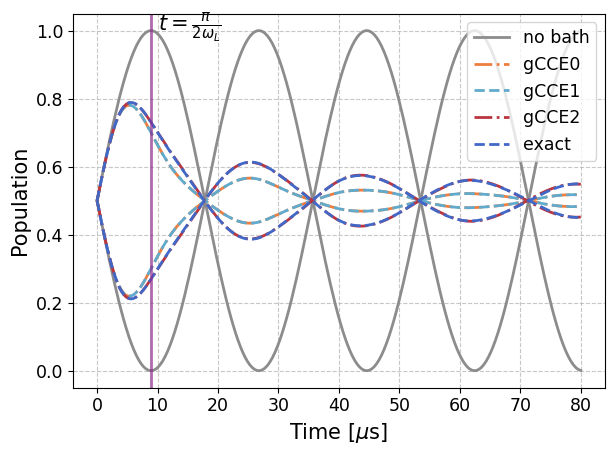

In [95]:
env_approx_levels = ['no_bath', 'gCCE0', 'gCCE1', 'gCCE2', 'full_bath']
Bz = 1e-6
import seaborn as sns
colors = ['#8c8c8c', '#ed7e40', '#60abcd', '#b93540', '#4167c7']
ls = ['-', '-.', '--', '-.', '--']
labels = ['no bath', 'gCCE0', 'gCCE1', 'gCCE2', 'exact']

filename = "bench"
save_directory = os.path.join(os.getcwd(), "export", filename)

fig, ax = plt.subplots(figsize=(6.4, 4.8))
for i, env_approx_level in enumerate(env_approx_levels):
    if env_approx_level == 'full_bath':
        filename += "_full"
        save_directory = os.path.join(os.getcwd(), "export", filename)
    
    save_filename = f"{env_approx_level}_{int(Bz*1e6)}uT"
    save_loc = os.path.join(save_directory, save_filename)
    up_pop, down_pop = np.load(save_loc+'.npy')
    
    t_end, t_steps = 80e-6, 200
    t_list = np.linspace(0, t_end, t_steps)
    ax.plot((t_list*1e6), up_pop[0], color=colors[i], ls=ls[i], label=labels[i])
    ax.plot((t_list*1e6), down_pop[0], color=colors[i], ls=ls[i])

ax.legend()
ax.set_ylabel('Population')
ax.set_xlabel(r'Time [$\mu$s]' )
plt.legend(ncol=1, loc="upper right", frameon=True)
# ax.set_ylim(0,1.02)
plt.axvline(x=np.pi/abs(2*1e-6*CONST['gamma_e'])*1e6, color='#8f288c', alpha=0.7)
plt.text(10,1, r'$t=\frac{\pi}{2\omega_L}$')
plt.savefig('gCCE_benchmark.svg')
plt.show()

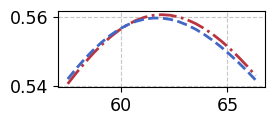

In [91]:
env_approx_levels = ['gCCE2', 'full_bath']
Bz = 1e-6
import seaborn as sns
colors = ['#b93540', '#4167c7']
ls = ['-.', '--']
labels = ['gCCE2', 'exact']

filename = "bench"
save_directory = os.path.join(os.getcwd(), "export", filename)

fig, ax = plt.subplots(figsize=(3,1.5))
for i, env_approx_level in enumerate(env_approx_levels):
    if env_approx_level == 'full_bath':
        filename += "_full"
        save_directory = os.path.join(os.getcwd(), "export", filename)
    save_filename = f"{env_approx_level}_{int(Bz*1e6)}uT"
    save_loc = os.path.join(save_directory, save_filename)
    up_pop, down_pop = np.load(save_loc+'.npy')
    
    t_end, t_steps = 80e-6, 200
    t_list = np.linspace(0, t_end, t_steps)
    ax.plot((t_list*1e6)[143:166], down_pop[0][143:166], color=colors[i], ls=ls[i], label=labels[i])

plt.savefig('gCCE_benchmark_inset.svg')
plt.show()

### Equations

In [24]:
prefactor = 8*np.pi**2/(c.hbar*c.mu_0*CONST['gamma_e']**2) * 1e-27 # in [ns/nm^3]
tau = prefactor * (10**2+5**2)**(5/2) / (2*10**2-5**2) *1e6 # in us
tau

19.174972895990205